In [3]:
import math
import os
import scipy
from scipy.optimize import lsq_linear
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, halfnorm
import random
from scipy.io import loadmat
import random
import pickle
import sys
sys.path.append(r"c:\Users\katie\OneDrive\Documents\GitHub\trial")
import PCA_Regress as pcar

In [4]:
base_path =r"c:\Users\katie\OneDrive\Desktop\Thesis"
with open(base_path+'\J_neu.pkl', "rb") as input_file:
    J_pickle = pickle.load(input_file)
del input_file



base_path =r"c:\Users\katie\OneDrive\Desktop\Thesis"
with open(base_path+'\J_mus.pkl', "rb") as input_file:
    J_pickle_m = pickle.load(input_file)
del input_file

# base_path = "/Users/kb6113/Desktop/Thesis"
# with open(base_path+'/J_neu.pkl', "rb") as input_file:
#     J_pickle = pickle.load(input_file)
# del input_file

# with open(base_path+'/J_mus.pkl', "rb") as input_file:
#     J_pickle_m = pickle.load(input_file)
# del input_file

J_all_tensor = J_pickle['J_all']['interpPSTH']
J_all_PSTH = pcar.shape_matrix(J_all_tensor)
J_all_PSTH_scaled = pcar.scaling(J_all_tensor)

J_mus_tensor = J_pickle_m['interpPSTH']
J_mus_PSTH = pcar.shape_matrix(J_mus_tensor)
J_mus_PSTH_scaled = pcar.scaling(J_mus_tensor)
J_mus_stack = np.vstack((J_mus_tensor, J_mus_tensor, J_mus_tensor, J_mus_tensor))
print(J_mus_tensor.shape)
print(J_all_tensor.shape)

_, sing, _ = pcar.run_PCA(J_all_PSTH_scaled, 6)
print(sing.shape)


(27, 32, 236)
(108, 202, 236)
(202, 6)


<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:9: SyntaxWarning: invalid escape sequence '\J'
<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:9: SyntaxWarning: invalid escape sequence '\J'
C:\Users\katie\AppData\Local\Temp\ipykernel_37372\3055207584.py:2: SyntaxWarning: invalid escape sequence '\J'
  with open(base_path+'\J_neu.pkl', "rb") as input_file:
C:\Users\katie\AppData\Local\Temp\ipykernel_37372\3055207584.py:9: SyntaxWarning: invalid escape sequence '\J'
  with open(base_path+'\J_mus.pkl', "rb") as input_file:


In [10]:
# J_mus_stack = np.vstack((J_mus_PSTH, J_mus_PSTH, J_mus_PSTH, J_mus_PSTH))
# J_mus_mc = J_mus_stack - np.mean(J_mus_stack, axis = 0)
# J_all_mc = J_all_PSTH - np.mean(J_all_PSTH, axis = 0)


W, M_hat, M_hat_recon, R_squared, MSE, rank_N  = pcar.fig_4(J_all_tensor, J_mus_stack)




>>> best_lam returning: 0.01


In [11]:

print(rank_N.shape)
print(W.shape)
print(MSE)
print(R_squared)
U, S_val, V = np.linalg.svd(W)


W_potent = U[:, :3] 
W_null = U[:, 3:]

N_potent =  rank_N @ W_potent
proj_1 = rank_N @ W_null

prep_time = np.arange(300, 810, 10)
move_time = np.arange(1500, 2160, 10)
all_time = np.concatenate((prep_time , move_time))
time_bins = int(N_potent.shape[0] / 108)



(12636, 6)
(6, 3)
0.17387557369348425
[0.2935672  0.92412121 0.97144249]


>>> best_lam returning: 0.01


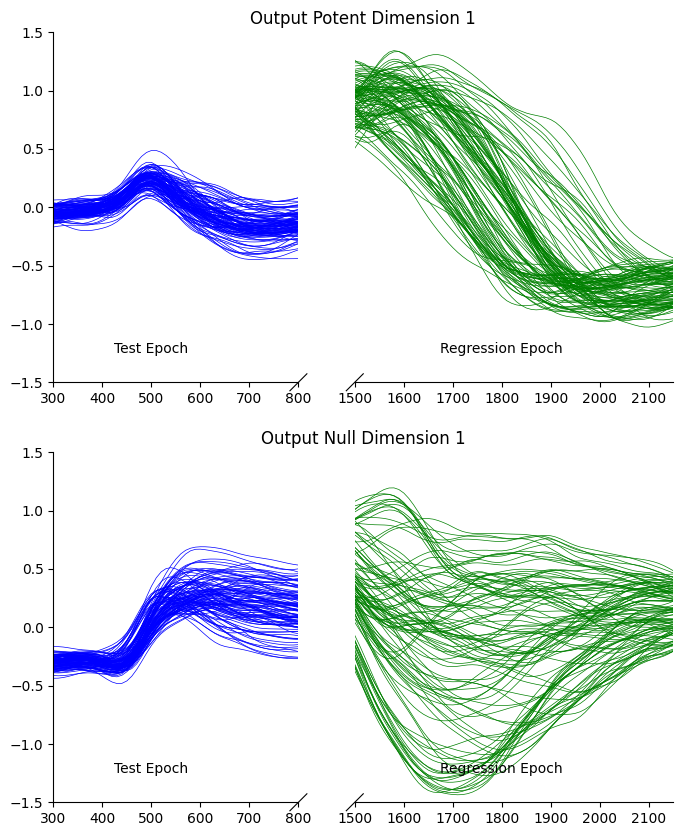

(array([[ 0.08891064, -0.01295716, -0.01975768],
        [-0.40530805, -0.02968461,  0.07588049],
        [-0.45144582,  0.1985186 , -0.01485223],
        [ 0.17044235,  0.11455317, -0.02920652],
        [-0.12843054, -0.13812483, -0.07379247],
        [ 0.21269576,  0.14681497, -0.06350182]]),
 array([[-0.57934685,  0.16484533,  0.0583825 ],
        [-0.56381601,  0.16533922,  0.06333438],
        [-0.55089138,  0.16599185,  0.06790937],
        ...,
        [ 0.45822815, -0.17656537,  0.08513575],
        [ 0.45418024, -0.18203461,  0.08197663],
        [ 0.44946325, -0.18666682,  0.07931258]], shape=(7128, 3)),
 array([[ 0.1833302 ,  0.15162273, -0.02513407, ...,  0.10771398,
          0.02286705, -0.13776315],
        [ 0.17924144,  0.14758878, -0.0228461 , ...,  0.10549773,
          0.02273097, -0.13702944],
        [ 0.17588523,  0.14423038, -0.02086941, ...,  0.10369697,
          0.0226496 , -0.13659335],
        ...,
        [-0.14437297, -0.12436757, -0.00497925, ..., -0.076

In [15]:
pcar.fig_4(J_all_tensor, J_mus_stack, plot = True)

>>> best_lam returning: 0.37926901907322497


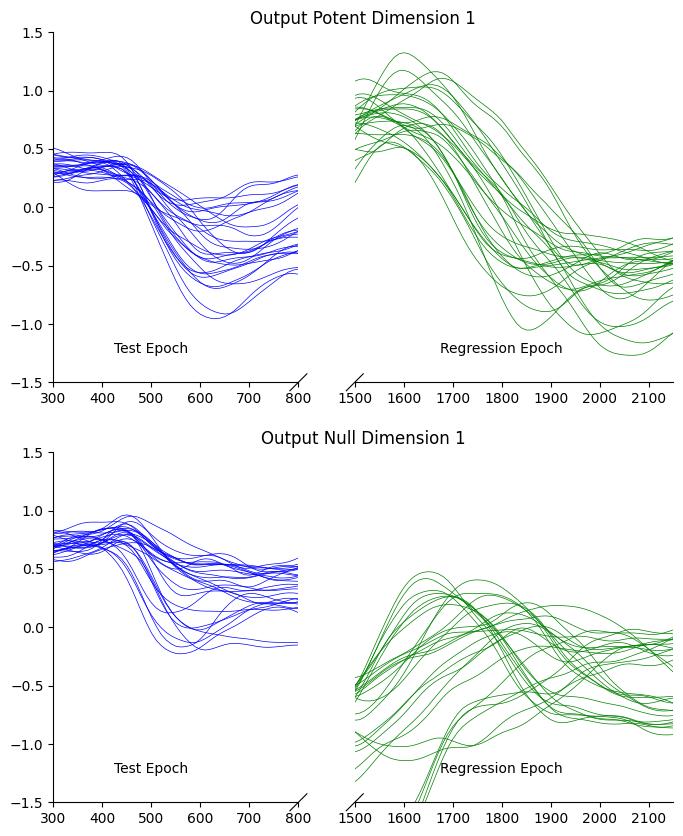

(array([[ 0.06962492, -0.01811126, -0.01764172],
        [-0.20358975,  0.05894763,  0.14374852],
        [-0.43535899,  0.15337292, -0.03522253],
        [-0.16267371, -0.13481925, -0.03788043],
        [ 0.48129764,  0.32582532,  0.11209667],
        [-0.07059184, -0.01882494, -0.02596642]]),
 array([[-0.5356248 ,  0.20106127, -0.03024946],
        [-0.52870775,  0.18542463, -0.04086701],
        [-0.52097282,  0.17241981, -0.04908531],
        ...,
        [ 0.36701178, -0.07236164, -0.19589518],
        [ 0.36377507, -0.07318276, -0.19812043],
        [ 0.36189294, -0.07347984, -0.2003014 ]], shape=(1782, 3)),
 array([[ 0.17118967,  0.1436936 ,  0.00023113, ...,  0.09444701,
          0.01648348, -0.12441653],
        [ 0.16706103,  0.14162085, -0.00437256, ...,  0.09194386,
          0.01540134, -0.11631875],
        [ 0.16309766,  0.13938036, -0.00793333, ...,  0.08957561,
          0.01448187, -0.10946615],
        ...,
        [-0.11952795, -0.09150531,  0.03658934, ..., -0.079

In [16]:
pcar.fig_4(J_all_tensor[:27,:,:], J_mus_tensor, plot = True)

>>> best_lam returning: 0.01


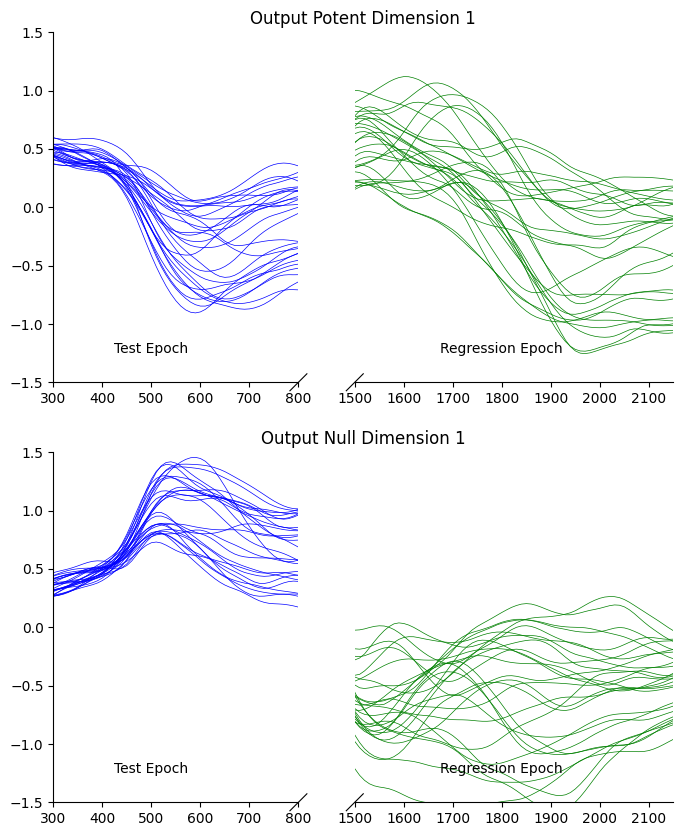

(array([[ 0.08463977,  0.01469177, -0.02773405],
        [-0.4576809 ,  0.18467023,  0.04419681],
        [-0.04281831, -0.19838734,  0.26295968],
        [-0.07393084, -0.38795107, -0.16170403],
        [ 0.38301138,  0.2772881 , -0.17562561],
        [-0.10541776, -0.30908745,  0.0826252 ]]),
 array([[-0.45059531,  0.18621993,  0.21990302],
        [-0.45397619,  0.17603712,  0.22386624],
        [-0.45735926,  0.16476391,  0.2265514 ],
        ...,
        [ 0.41561081, -0.18235823,  0.2815109 ],
        [ 0.41521824, -0.19043178,  0.26646701],
        [ 0.41173218, -0.19740941,  0.25262735]], shape=(1782, 3)),
 array([[ 0.15659042,  0.11618421, -0.00539522, ...,  0.09943042,
          0.02956765, -0.16324142],
        [ 0.15658908,  0.11660235, -0.01012927, ...,  0.09999445,
          0.02977988, -0.16132331],
        [ 0.15641241,  0.11701059, -0.01523037, ...,  0.10042319,
          0.02989693, -0.15878516],
        ...,
        [-0.12449139, -0.11798303, -0.0235714 , ..., -0.053

In [18]:
pcar.fig_4(J_all_tensor[27:54,:,:], J_mus_tensor, plot = True)

>>> best_lam returning: 0.01


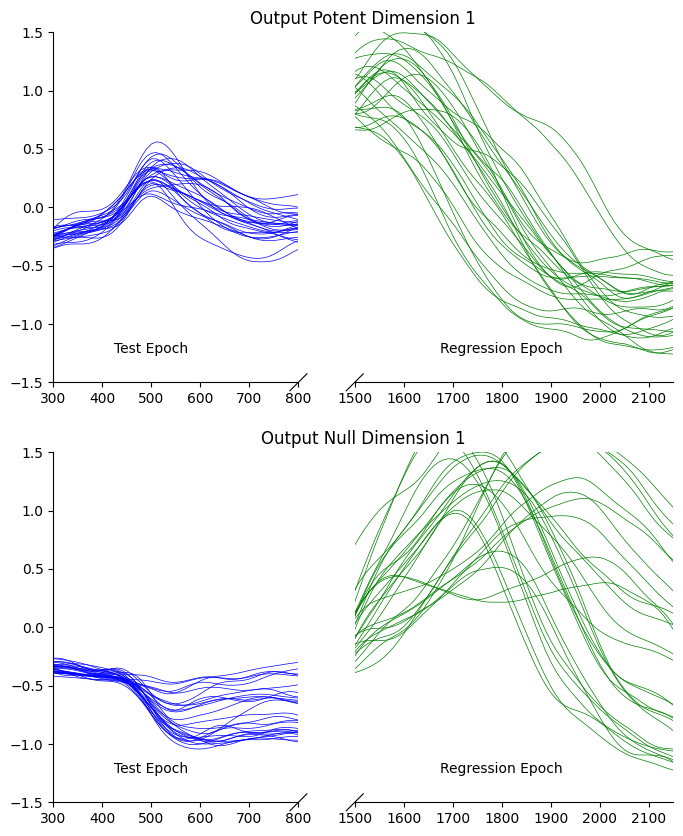

(array([[ 0.06179387, -0.03662901,  0.00088335],
        [-0.13173654,  0.09440217, -0.14044684],
        [-0.53938813,  0.03998673,  0.187065  ],
        [ 0.08434594,  0.00398421,  0.21363604],
        [-0.22114986, -0.09949813, -0.05726109],
        [-0.09124625,  0.03152148, -0.09337792]]),
 array([[-0.60685898,  0.04531658,  0.23740594],
        [-0.58178828,  0.03487745,  0.25108667],
        [-0.55433931,  0.02541721,  0.26339172],
        ...,
        [ 0.40756676, -0.14476594, -0.05389937],
        [ 0.40421712, -0.14712328, -0.05669611],
        [ 0.40194413, -0.14888138, -0.0593463 ]], shape=(1782, 3)),
 array([[ 0.18567281,  0.15058032, -0.08553212, ...,  0.12277537,
          0.03335704, -0.14244065],
        [ 0.1780812 ,  0.14355407, -0.08656618, ...,  0.1192939 ,
          0.03334511, -0.13895305],
        [ 0.16987008,  0.13598762, -0.08678553, ...,  0.11533247,
          0.03318991, -0.13517465],
        ...,
        [-0.13270666, -0.10739282,  0.00694374, ..., -0.077

In [67]:
pcar.fig_4(J_all_tensor[54:81,:,:], J_mus_tensor, plot = True)

>>> best_lam returning: 0.01


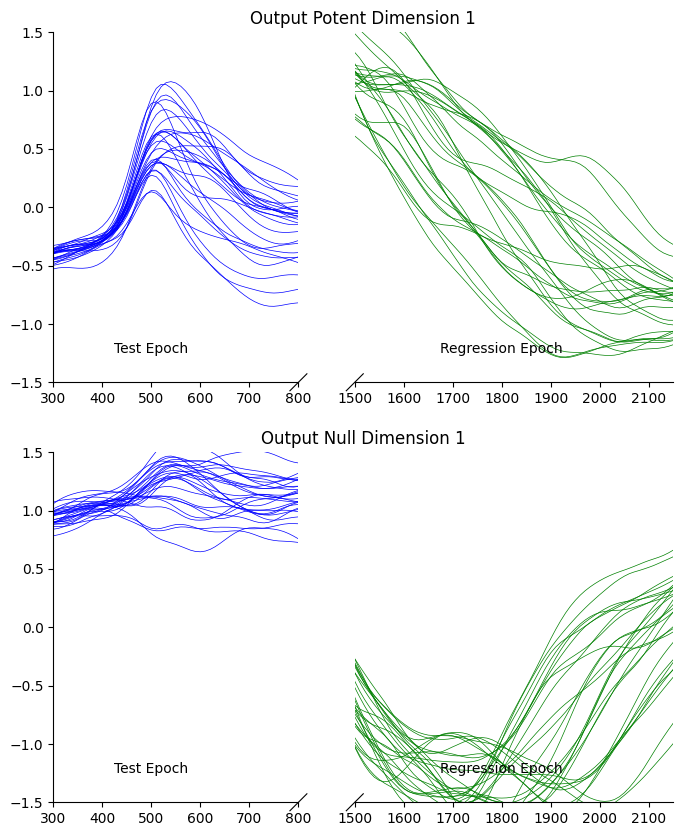

(array([[ 0.08521433, -0.0054697 , -0.01364555],
        [ 0.53352637,  0.20031444, -0.02731031],
        [-0.30670938,  0.32898144, -0.10484722],
        [ 0.0783216 ,  0.19853834,  0.26520854],
        [-0.01251701,  0.10140606,  0.0187321 ],
        [-0.1574492 , -0.06397194, -0.04898598]]),
 array([[-0.66929452,  0.28034192, -0.04507921],
        [-0.61215328,  0.30550733, -0.01595618],
        [-0.55445688,  0.3314851 ,  0.01249568],
        ...,
        [ 0.30066834, -0.40924419,  0.13920508],
        [ 0.30976449, -0.39304333,  0.13915849],
        [ 0.31652395, -0.3793885 ,  0.13705806]], shape=(1782, 3)),
 array([[ 0.21680385,  0.18072529,  0.01215892, ...,  0.1183583 ,
          0.02052876, -0.1630468 ],
        [ 0.20481057,  0.16646222,  0.02925726, ...,  0.1118046 ,
          0.02102921, -0.17006001],
        [ 0.19272181,  0.15210096,  0.04679417, ...,  0.10512955,
          0.02148198, -0.1771132 ],
        ...,
        [-0.12345429, -0.09363073, -0.12342658, ..., -0.052

In [70]:
pcar.fig_4(J_all_tensor[81:108,:,:], J_mus_tensor, plot = True)